# 🏔️ Reliefs Intérieurs
## Génération d’un paysage 3D à partir du bruit de Perlin

Dans ce projet, nous transformons un simple bruit cohérent en un relief 3D.
Le bruit devient une montagne, une vallée, un territoire imaginaire.

Objectif :
- créer un heightmap cohérent
- le visualiser en 3D
- ajouter une lumière directionnelle pour révéler les ombres
- produire une image expressive, presque picturale


In [1]:
!pip install noise

import numpy as np
import matplotlib.pyplot as plt
from noise import pnoise2
from mpl_toolkits.mplot3d import Axes3D


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for noise: filename=noise-1.2.2-cp312-cp312-linux_x86_64.whl size=56635 sha256=f240c4727deda2cdfbc057c464c25844c1069368f4b654b8909343856bc458fe
  Stored in directory: /root/.cache/pip/wheels/78/71/a2/47a0c6acdeb8f7a2f4e69067d3c737219e36414136441a1ef8
Successfully built noise


In [2]:
def generate_heightmap(width, height, scale=100, octaves=6, persistence=0.5, lacunarity=2.0):
    """Génère un heightmap basé sur du bruit de Perlin."""
    hm = np.zeros((height, width))

    for y in range(height):
        for x in range(width):
            nx = x / scale
            ny = y / scale
            hm[y][x] = pnoise2(nx, ny,
                               octaves=octaves,
                               persistence=persistence,
                               lacunarity=lacunarity)

    # Normalisation entre 0 et 1
    hm = (hm - hm.min()) / (hm.max() - hm.min())
    return hm


In [3]:
def apply_lighting(heightmap, azimuth=45, altitude=45):
    """Calcule une carte d'ombres basée sur la lumière directionnelle."""
    # Conversion en radians
    az = np.radians(azimuth)
    alt = np.radians(altitude)

    # Gradients
    gy, gx = np.gradient(heightmap)

    # Normale du terrain
    normal_x = -gx
    normal_y = -gy
    normal_z = 1.0

    # Normalisation
    norm = np.sqrt(normal_x**2 + normal_y**2 + normal_z**2)
    normal_x /= norm
    normal_y /= norm
    normal_z /= norm

    # Direction de la lumière
    lx = np.cos(alt) * np.cos(az)
    ly = np.cos(alt) * np.sin(az)
    lz = np.sin(alt)

    # Intensité de la lumière
    shading = normal_x * lx + normal_y * ly + normal_z * lz
    shading = np.clip(shading, 0, 1)

    return shading


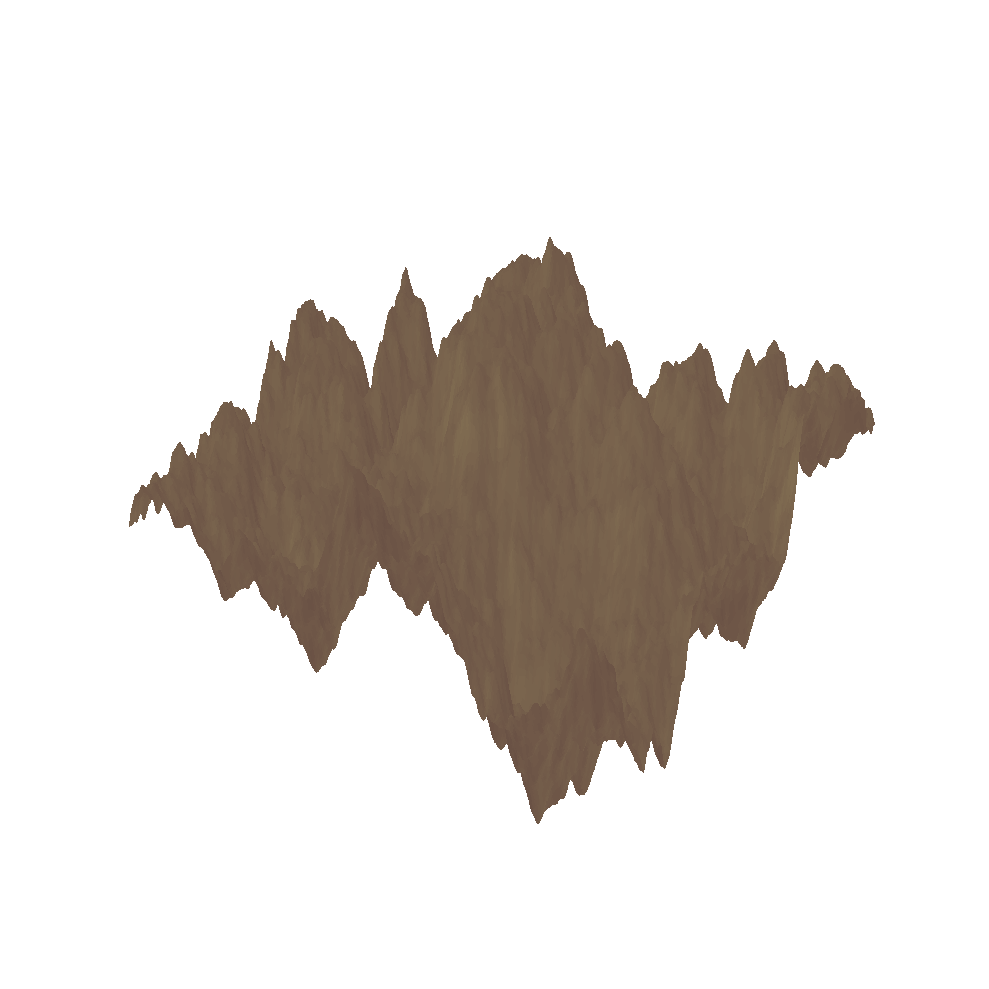

In [4]:
width, height = 300, 300

hm = generate_heightmap(width, height)
shading = apply_lighting(hm, azimuth=60, altitude=45)

X, Y = np.meshgrid(np.arange(width), np.arange(height))

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, hm, facecolors=plt.cm.terrain(shading),
                rstride=1, cstride=1, linewidth=0, antialiased=False)

ax.set_axis_off()
plt.tight_layout()
plt.show()


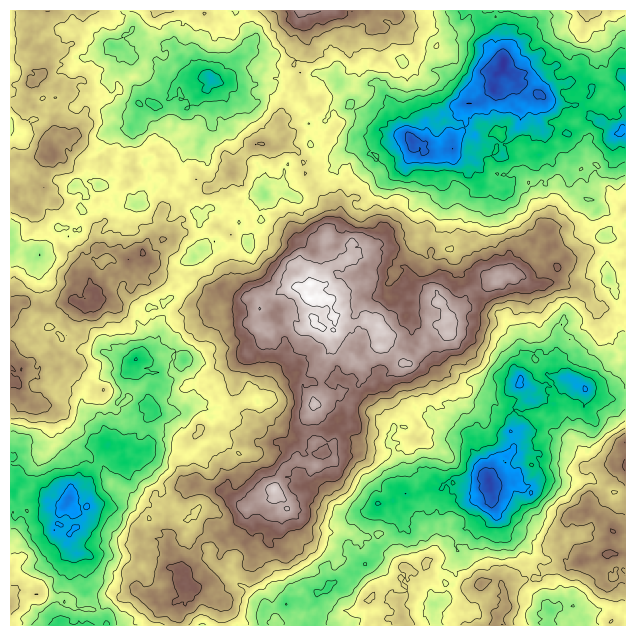

In [5]:
plt.figure(figsize=(8, 8))
plt.imshow(hm, cmap="terrain")
plt.contour(hm, levels=12, colors="black", linewidths=0.4)
plt.axis("off")
plt.show()
